In [1]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# filename = "/home/clevyfidel/clevyfidel/Workspace/goin/opt_coin/comparison_results_medium.pkl"
# filename = "/home/clevyfidel/clevyfidel/Workspace/goin/opt_coin/comparison_results_progress_cores.pkl"
# filename = "/home/clevyfidel/clevyfidel/Workspace/goin/opt_coin/comparison_results_512.pkl"
filename = "/home/clevyfidel/clevyfidel/Workspace/goin/opt_coin/output/inference_results_logpm_corr_10.pkl"


with open(filename, 'rb') as f:
    data = pickle.load(f)

In [4]:
data # As a reminder, "small" ran with 2 samples, 5 timepoints, for each of the 8 configs

{0: {'gamma_t': np.float64(0.1),
  'alpha_t': np.float64(0.1),
  'rho_t': np.float64(0.1),
  'ctx_count': 2,
  'Python': {'time': 0.04852677981058757,
   'logp_y_avg': array([ 0.76203185,  0.19743614, -0.29244234, -0.71323683,  0.32971968,
           0.56179799,  0.64923505,  0.41544356,  0.45113356,  0.36516407]),
   'logp_y_sum': array([ 7.62031846,  1.97436143, -2.92442338, -7.13236826,  3.29719683,
           5.61797987,  6.49235051,  4.15443561,  4.5113356 ,  3.65164069]),
   'logp_c_avg': array([-0.00373736, -0.03970519, -0.00257322, -0.69207518, -0.00271255,
          -0.00231176, -0.00518211, -0.01116775, -0.00638824, -0.02223002]),
   'logp_c_sum': array([-0.03737362, -0.39705188, -0.02573218, -6.92075178, -0.02712549,
          -0.02311764, -0.05182115, -0.11167746, -0.06388244, -0.22230016])},
  'Leaky': {'time': 0.021289217472076415,
   'logp_y_avg': array([ -1.59696166,   0.35395983,  -3.24909139, -11.27530421,
            0.26063899,   0.2694721 ,   0.68910134,  -0.069277

In [4]:
data.keys()# here 8, will be 27 

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
data[0].keys()

dict_keys(['gamma_t', 'alpha_t', 'rho_t', 'ctx_count', 'Python', 'Leaky', 'Matlab'])

In [5]:
data[0]['Python']

{'time': 0.06536719799041749,
 'logp_y_avg': array([0.13116716, 0.42646169, 0.1547346 , 0.33218594, 0.815643  ,
        0.07800221, 0.65059552, 0.26597261, 0.10179749, 0.61627732]),
 'logp_y_sum': array([1.3116716 , 4.26461691, 1.547346  , 3.32185943, 8.15642997,
        0.78002211, 6.5059552 , 2.65972612, 1.01797487, 6.1627732 ]),
 'logp_c_avg': array([-0.00217235, -0.00212252, -0.00209805, -0.00535381, -0.00405238,
        -0.002097  , -0.00212539, -0.00258196, -0.00198465, -0.00198942]),
 'logp_c_sum': array([-0.02172346, -0.02122523, -0.02098048, -0.05353811, -0.04052378,
        -0.02096998, -0.02125391, -0.02581959, -0.01984648, -0.01989421])}

In [5]:
df_logpy = []
df_logpc = [] 
df_time = [] 

for id_config in data.keys():
    df_logpy_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_y_avg'],
                               'matlab': data[id_config]['Matlab']['logp_y_avg'],
                               'leaky': data[id_config]['Leaky']['logp_y_avg']})
    df_logpy_partial['id_config'] = id_config
    df_logpy.append(df_logpy_partial)
    
    df_logpc_partial = pd.DataFrame.from_dict({'python': data[id_config]['Python']['logp_c_avg'],
                               'matlab': data[id_config]['Matlab']['logp_c_avg'],
                               'leaky': data[id_config]['Leaky']['logp_c_avg']})
    df_logpc_partial['id_config'] = id_config
    df_logpc.append(df_logpc_partial)

    df_time_partial = {'id_config': id_config,
                       'python': data[id_config]['Python']['time'],
                       'matlab': data[id_config]['Matlab']['time'],
                       'leaky': data[id_config]['Leaky']['time']}
    df_time.append(df_time_partial)

df_logpy = pd.concat(df_logpy, ignore_index=True)
df_logpc = pd.concat(df_logpc, ignore_index=True)
df_time = pd.DataFrame(df_time)


In [6]:
df_logpy.describe()

,python,matlab,leaky,id_config
count,270.000000,270.000000,270.000000,270.000000
mean,-0.335574,-0.264044,-1784.792727,13.000000
std,2.468097,1.564606,27875.145123,7.803345
min,-36.043653,-17.970115,-458026.162263,0.000000
25%,-0.510437,-0.519175,-5.825741,6.000000
50%,0.140713,0.138764,-1.153481,13.000000
75%,0.468864,0.474883,-0.112073,20.000000
max,0.904825,0.912555,1.360332,26.000000


In [21]:
df_logpc.describe()

/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/clevyfidel/.conda/envs/coin/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,python,matlab,leaky,id_config
count,270.000000,270.000000,270.000000,270.000000
mean,-inf,-inf,-inf,13.000000
std,NaN,NaN,NaN,7.803345
min,-inf,-inf,-inf,0.000000
25%,-0.689460,-0.705531,-1.258075,6.000000
50%,-0.062297,-0.074958,-0.254913,13.000000
75%,-0.015464,-0.016134,-0.040822,20.000000
max,-0.001577,-0.001682,0.000000,26.000000


KeyboardInterrupt: 

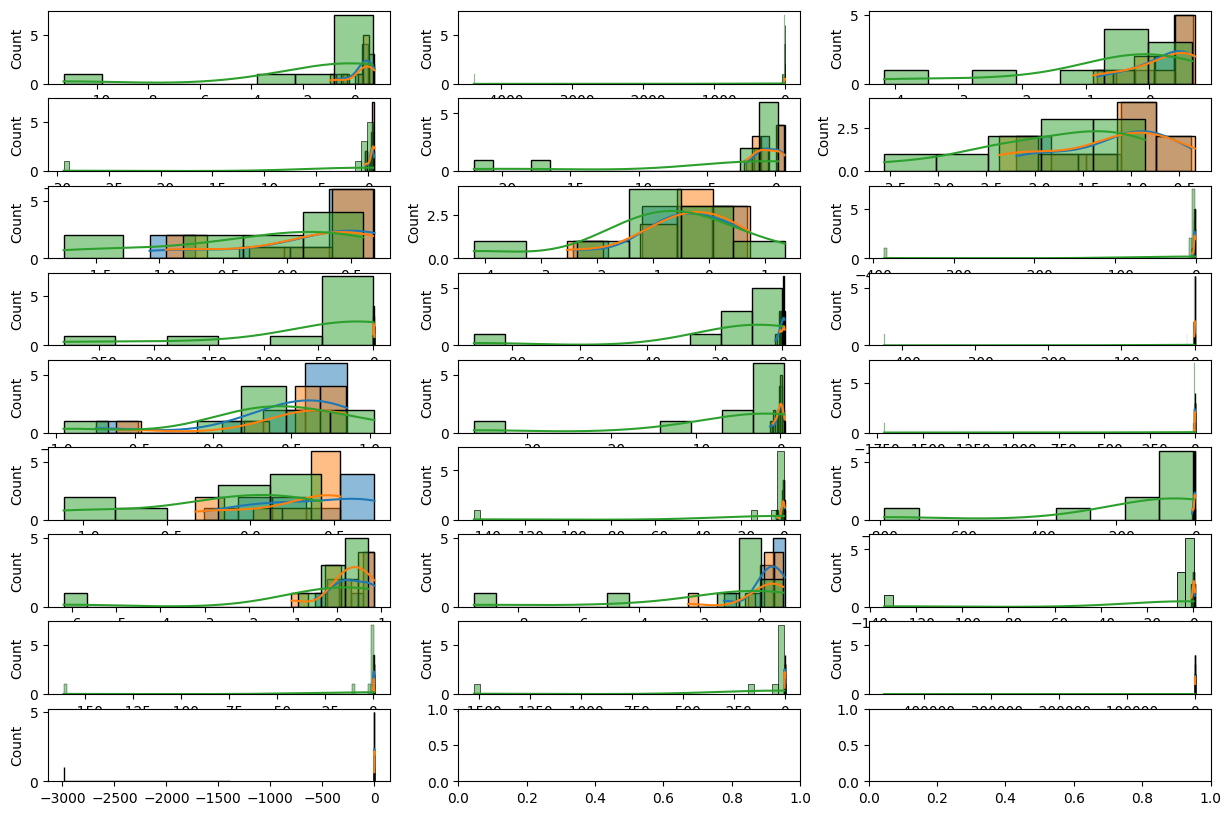

In [7]:
# Logp y (observations)
krows = 9
if len(data.keys())%krows==0:
    fig, axs = plt.subplots(krows, len(data.keys())//krows, figsize=(15, 10))
else:
    fig, axs = plt.subplots(krows, len(data.keys())//krows+1, figsize=(15, 10))
for i in range(len(data.keys())):
    sns.histplot(data=data[i]['Python']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    sns.histplot(data=data[i]['Matlab']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    sns.histplot(data=data[i]['Leaky']['logp_y_avg'], ax=axs.flatten()[i], kde=True)
    # axs.flatten()[i].hist(data[i]['Python']['logp_y_avg'])
    # axs.flatten()[i].hist(data[i]['Matlab']['logp_y_avg'])
    # axs.flatten()[i].hist(data[i]['Leaky']['logp_y_avg'])

In [ ]:
# Logp c (context)

In [ ]:
# Execution times